<a href="https://colab.research.google.com/github/ViniSpeck/DS/blob/main/DS_04_exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício 1 - Base de ocorrências da aviação civil

1) Importando as bibliotecas e base

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

df=pd.read_csv("https://catolicasc.sharepoint.com/sites/82606_1237_2/_layouts/15/download.aspx?UniqueId=ebee64af-d226-4dd0-b042-9dcd89fb1ae1&Translate=false&tempauth=eyJ0eXAiOiJKV1QiLCJhbGciOiJub25lIn0.eyJhdWQiOiIwMDAwMDAwMy0wMDAwLTBmZjEtY2UwMC0wMDAwMDAwMDAwMDAvY2F0b2xpY2FzYy5zaGFyZXBvaW50LmNvbUAxYjhhZWQ0NC1hN2QwLTQwOWMtOTc5Ni1iMjY0NTk0OTg2YTAiLCJpc3MiOiIwMDAwMDAwMy0wMDAwLTBmZjEtY2UwMC0wMDAwMDAwMDAwMDAiLCJuYmYiOiIxNjYzMTEzMTUwIiwiZXhwIjoiMTY2MzExNjc1MCIsImVuZHBvaW50dXJsIjoiVkZnVnMvVnM0VkIvS2ozV0ZwU0J1VkE3Qk90bStXZnVmQnMzUmZsYUgrST0iLCJlbmRwb2ludHVybExlbmd0aCI6IjE0MCIsImlzbG9vcGJhY2siOiJUcnVlIiwiY2lkIjoiT1RsbVkyRXlNVEl0TkRBeE5pMDBNalE0TFRobFltVXRPRFEyTXpFd01XTmxPVEEzIiwidmVyIjoiaGFzaGVkcHJvb2Z0b2tlbiIsInNpdGVpZCI6Ik1EZzFNREk0WWpZdFptRmlZaTAwTUdJMkxXSXpORGt0TmpBellqSTJaamd4WVRsaCIsImFwcF9kaXNwbGF5bmFtZSI6Ik1pY3Jvc29mdCBUZWFtcyBXZWIgQ2xpZW50IiwiZ2l2ZW5fbmFtZSI6IlZJTsONQ0lVUyIsImZhbWlseV9uYW1lIjoiU1BFQ0siLCJzaWduaW5fc3RhdGUiOiJbXCJrbXNpXCJdIiwiYXBwaWQiOiI1ZTNjZTZjMC0yYjFmLTQyODUtOGQ0Yi03NWVlNzg3ODczNDYiLCJ0aWQiOiIxYjhhZWQ0NC1hN2QwLTQwOWMtOTc5Ni1iMjY0NTk0OTg2YTAiLCJ1cG4iOiJ2aW5pY2l1cy5zcGVja0BjYXRvbGljYXNjLmVkdS5iciIsInB1aWQiOiIxMDAzMjAwMDVBN0RFMUJDIiwiY2FjaGVrZXkiOiIwaC5mfG1lbWJlcnNoaXB8MTAwMzIwMDA1YTdkZTFiY0BsaXZlLmNvbSIsInNjcCI6ImFsbGZpbGVzLndyaXRlIGdyb3VwLnJlYWQgYWxsc2l0ZXMud3JpdGUiLCJ0dCI6IjIiLCJ1c2VQZXJzaXN0ZW50Q29va2llIjpudWxsLCJpcGFkZHIiOiIyMC4xOTAuMTczLjI1In0.WjhaSHI4a25QQUFGeERHWXhxSHgvNllWenRPcmJVT2IyY3lGODRPZU5sdz0&ApiVersion=2.0")

2) Exibindo a quantidade de entradas (linhas) e variáveis (colunas) utilizando o método `shape`

In [119]:
print("Entradas:", df.shape[0])
print("Variáveis:", df.shape[1])

Entradas: 5208
Variáveis: 22


3) Verificando os tipos das variáveis (colunas)

In [120]:
df.dtypes

codigo_ocorrencia                   int64
ocorrencia_classificacao           object
ocorrencia_tipo                    object
ocorrencia_tipo_categoria          object
ocorrencia_tipo_icao               object
ocorrencia_latitude               float64
ocorrencia_longitude              float64
ocorrencia_cidade                  object
ocorrencia_uf                      object
ocorrencia_pais                    object
ocorrencia_aerodromo               object
ocorrencia_dia                     object
ocorrencia_horario                 object
investigacao_aeronave_liberada     object
investigacao_status                object
divulgacao_relatorio_numero        object
divulgacao_relatorio_publicado     object
divulgacao_dia_publicacao          object
total_recomendacoes                 int64
total_aeronaves_envolvidas          int64
ocorrencia_saida_pista             object
ocorrencia_dia_extracao            object
dtype: object

4) Utilizando a função `head()` para ver as 10 primeiras linhas

In [121]:
df.head(10)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,...,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
2,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,...,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
3,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,...,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
4,201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,...,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
5,200808073991179,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,-9.1194,-68.5978,CEREJEIRAS,RO,BRASIL,...,15:10:00,NaN,FINALIZADA,A - 517/CENIPA/2016,SIM,2016-07-07,0,1,SIM,2018-08-28
6,201108118145873,ACIDENTE,POUSO LONGO,EXCURSÃO DE PISTA,RE,3.7119,-64.1625,AMAJARI,RR,BRASIL,...,17:00:00,NaN,FINALIZADA,A-105/CENIPA/2012,SIM,2012-09-20,4,1,NÃO,2018-08-28
7,201604251335501,INCIDENTE GRAVE,TRÁFEGO AÉREO,PERDA DE SEPARAÇÃO / COLISÃO EM VOO,MAC,3.5544,-61.8694,AMAJARI,RR,BRASIL,...,05:48:00,SIM,ATIVA,IG-069/CENIPA/2016,NÃO,NaN,0,2,NÃO,2018-08-28
8,201604062021424,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,3.7633,-62.4094,AMAJARI,RR,BRASIL,...,16:05:00,SIM,FINALIZADA,A-063/CENIPA/2016,SIM,2017-06-22,2,1,SIM,2018-08-28
9,200902274965349,INCIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,3.6521,-61.4206,AMAJARI,RR,BRASIL,...,16:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,SIM,2018-08-28


5) Visualizando os valores únicos da variável ocorrencia_classificacao através da função `unique()`

In [122]:
df.ocorrencia_classificacao.unique()

array(['ACIDENTE', 'INCIDENTE GRAVE', 'INCIDENTE'], dtype=object)

6) Visualizando os estados que possuem mais ocorrências com aeronaves ordenados, utilizando as funções `groupby()` para agrupar por estado, `size()` para contar as ocorrências e `sort_values(ascending=False)` para mostrar em ordem decrescente. O estado com mais ocorrências é São Paulo.

In [123]:
df.groupby('ocorrencia_uf').size().sort_values(ascending=False)

ocorrencia_uf
SP     1207
RJ      498
MG      476
PR      437
RS      350
GO      268
PA      255
MT      244
AM      219
BA      208
SC      160
DF      151
MS      132
PE       88
CE       75
ES       66
MA       63
TO       54
AC       53
RR       50
PI       39
RO       30
PB       20
SE       18
AL       16
RN       15
AP       13
***       3
dtype: int64

7) Calculando a porcentagem de ocorrências FALHA DO MOTOR EM VOO através da divisão da quantidade de entradas com FALHA DO MOTOR EM VOO (utilizando a função `value_counts()`, sobre o número total de ocorrências, utilizando o método `shape`.

In [124]:
(df.ocorrencia_tipo.value_counts()['FALHA DO MOTOR EM VOO']/df.shape[0])*100

13.095238095238097

Exercício 2 - Ações BBAS3

Importando bibliotecas e base

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

df_bbas3=pd.read_csv("https://catolicasc.sharepoint.com/sites/82606_1237_2/_layouts/15/download.aspx?UniqueId=46a9e3f2-e1fc-4129-8bf4-f1a34c72e40d&Translate=false&tempauth=eyJ0eXAiOiJKV1QiLCJhbGciOiJub25lIn0.eyJhdWQiOiIwMDAwMDAwMy0wMDAwLTBmZjEtY2UwMC0wMDAwMDAwMDAwMDAvY2F0b2xpY2FzYy5zaGFyZXBvaW50LmNvbUAxYjhhZWQ0NC1hN2QwLTQwOWMtOTc5Ni1iMjY0NTk0OTg2YTAiLCJpc3MiOiIwMDAwMDAwMy0wMDAwLTBmZjEtY2UwMC0wMDAwMDAwMDAwMDAiLCJuYmYiOiIxNjYzMTExMzY0IiwiZXhwIjoiMTY2MzExNDk2NCIsImVuZHBvaW50dXJsIjoieHdqSFpPVUR0Wjd3WlQzeHFnVUpHdytMeXFRb3pXajBEbHgyYjJzVUN0bz0iLCJlbmRwb2ludHVybExlbmd0aCI6IjE0MCIsImlzbG9vcGJhY2siOiJUcnVlIiwiY2lkIjoiT1dRd05qTXdZMlV0TkRrd1lpMDBZVFk0TFdJNFpUWXRaVFJpWkdZeE5tTXlPV0kzIiwidmVyIjoiaGFzaGVkcHJvb2Z0b2tlbiIsInNpdGVpZCI6Ik1EZzFNREk0WWpZdFptRmlZaTAwTUdJMkxXSXpORGt0TmpBellqSTJaamd4WVRsaCIsImFwcF9kaXNwbGF5bmFtZSI6Ik1pY3Jvc29mdCBUZWFtcyBXZWIgQ2xpZW50IiwiZ2l2ZW5fbmFtZSI6IlZJTsONQ0lVUyIsImZhbWlseV9uYW1lIjoiU1BFQ0siLCJzaWduaW5fc3RhdGUiOiJbXCJrbXNpXCJdIiwiYXBwaWQiOiI1ZTNjZTZjMC0yYjFmLTQyODUtOGQ0Yi03NWVlNzg3ODczNDYiLCJ0aWQiOiIxYjhhZWQ0NC1hN2QwLTQwOWMtOTc5Ni1iMjY0NTk0OTg2YTAiLCJ1cG4iOiJ2aW5pY2l1cy5zcGVja0BjYXRvbGljYXNjLmVkdS5iciIsInB1aWQiOiIxMDAzMjAwMDVBN0RFMUJDIiwiY2FjaGVrZXkiOiIwaC5mfG1lbWJlcnNoaXB8MTAwMzIwMDA1YTdkZTFiY0BsaXZlLmNvbSIsInNjcCI6ImFsbGZpbGVzLndyaXRlIGdyb3VwLnJlYWQgYWxsc2l0ZXMud3JpdGUiLCJ0dCI6IjIiLCJ1c2VQZXJzaXN0ZW50Q29va2llIjpudWxsLCJpcGFkZHIiOiIyMC4xOTAuMTczLjI1In0.OGFDZERZZ2F5ZnJJcjFPdjZtREtDdnNYRm9WMVlRd2E4SXpuZkZIVlBaQT0&ApiVersion=2.0")

3) Utilizando a função `head()` para ver as 5 primeiras linhas

In [126]:
df_bbas3.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Ajuste Fech,Volume
0,2018-09-21,29.730000,30.580000,29.340000,30.580000,28.680056,16301600
1,2018-09-24,30.379999,30.700001,29.500000,29.730000,27.882866,13086900
2,2018-09-25,29.030001,29.760000,28.809999,29.549999,27.714045,11742900
3,2018-09-26,29.650000,29.969999,29.209999,29.450001,27.620264,12842400
4,2018-09-27,29.680000,30.299999,29.680000,30.290001,28.408072,8767900


4) Visualizando os dados da ação no dia 04 de Outubro de 2018 utilizando o parâmetro `df_bbas3['Data']=='2018-10-04'` no Dataframe.



In [127]:
df_bbas3[df_bbas3['Data']=='2018-10-04']

,Data,Abertura,Maximo,Minimo,Fechamento,Ajuste Fech,Volume
9,2018-10-04,33.68,35.880001,33.52,35.119999,32.937988,27920000


5) Verificando a média do volume sobre todo o período com a função `mean()`

In [128]:
df_bbas3['Volume'].mean()

11928526.016260162

Exercício 3 - Projeto +BIKE 

Importando bibliotecas e base

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

df_rides=pd.read_csv("https://catolicasc.sharepoint.com/sites/82606_1237_2/_layouts/15/download.aspx?UniqueId=76013003-5492-4e3a-993d-c8214a1f04dd&Translate=false&tempauth=eyJ0eXAiOiJKV1QiLCJhbGciOiJub25lIn0.eyJhdWQiOiIwMDAwMDAwMy0wMDAwLTBmZjEtY2UwMC0wMDAwMDAwMDAwMDAvY2F0b2xpY2FzYy5zaGFyZXBvaW50LmNvbUAxYjhhZWQ0NC1hN2QwLTQwOWMtOTc5Ni1iMjY0NTk0OTg2YTAiLCJpc3MiOiIwMDAwMDAwMy0wMDAwLTBmZjEtY2UwMC0wMDAwMDAwMDAwMDAiLCJuYmYiOiIxNjYzMTExNTU0IiwiZXhwIjoiMTY2MzExNTE1NCIsImVuZHBvaW50dXJsIjoibjFHMnVrL29Fa2tHTVUreGhpTG5RNU1DY0pyQ1E0ZFkzT2d0dTdIY2RpTT0iLCJlbmRwb2ludHVybExlbmd0aCI6IjE0MCIsImlzbG9vcGJhY2siOiJUcnVlIiwiY2lkIjoiTmpZeE1qYzBPVGt0TUdSa1l5MDBNV1JsTFRoa01HUXRZVGhsWmpWbU9EUTFaVEptIiwidmVyIjoiaGFzaGVkcHJvb2Z0b2tlbiIsInNpdGVpZCI6Ik1EZzFNREk0WWpZdFptRmlZaTAwTUdJMkxXSXpORGt0TmpBellqSTJaamd4WVRsaCIsImFwcF9kaXNwbGF5bmFtZSI6Ik1pY3Jvc29mdCBUZWFtcyBXZWIgQ2xpZW50IiwiZ2l2ZW5fbmFtZSI6IlZJTsONQ0lVUyIsImZhbWlseV9uYW1lIjoiU1BFQ0siLCJzaWduaW5fc3RhdGUiOiJbXCJrbXNpXCJdIiwiYXBwaWQiOiI1ZTNjZTZjMC0yYjFmLTQyODUtOGQ0Yi03NWVlNzg3ODczNDYiLCJ0aWQiOiIxYjhhZWQ0NC1hN2QwLTQwOWMtOTc5Ni1iMjY0NTk0OTg2YTAiLCJ1cG4iOiJ2aW5pY2l1cy5zcGVja0BjYXRvbGljYXNjLmVkdS5iciIsInB1aWQiOiIxMDAzMjAwMDVBN0RFMUJDIiwiY2FjaGVrZXkiOiIwaC5mfG1lbWJlcnNoaXB8MTAwMzIwMDA1YTdkZTFiY0BsaXZlLmNvbSIsInNjcCI6ImFsbGZpbGVzLndyaXRlIGdyb3VwLnJlYWQgYWxsc2l0ZXMud3JpdGUiLCJ0dCI6IjIiLCJ1c2VQZXJzaXN0ZW50Q29va2llIjpudWxsLCJpcGFkZHIiOiIyMC4xOTAuMTczLjI1In0.UjBUc3ZvZ1ZFRWZkQnFUUTIwd0tET2dndUlFRTNqZVpnWmcvaWFYbktzZz0&ApiVersion=2.0")

3) Utilizando a função `head()` para ver as 5 primeiras entradas

In [130]:
df_rides.head()

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


4) Verificando a porcentagem de valores nulos na coluna user_gender, utilizando as funções `isnull()` para pegar os nulos e `sum()` para somá-los. O valor é dividido pelo total de entradas e multiplicado por 100. Nesse caso, aproximadamente 0.14% dos valores da coluna estão nulos.

In [131]:
(df_rides.user_gender.isnull().sum()/df_rides.shape[0])*100

0.13782446175371188

5) Utilizando a função `mode()` para descobrir o valor que ocorre com mais frequência na coluna (moda). Nesse caso, o valor mais frequente é M, e então a coluna é preenchida com esse valor

In [132]:
df_rides.user_gender=df_rides.user_gender.mode()

6) Exibindo a coluna ride_duration em BoxPlot usando o parâmetro `kind='box'` dentro da função `plot()`. Além dos parâmetros `vert=False` para formatar horizontalmente e `figsize=(15,3)` para dimensionar o gráfico. A função `plt.show()` chamada do *Matplotlib* mostra o gráfico criado.

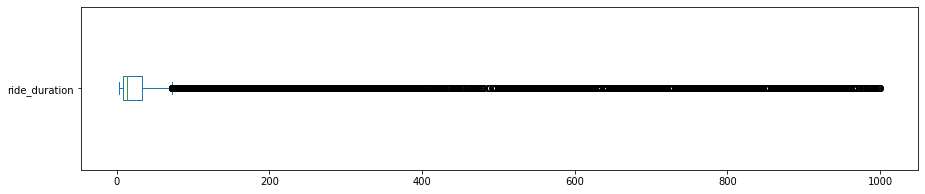

In [133]:
df_rides.ride_duration.plot(kind='box', vert=False, figsize=(15,3))
plt.show()